# Question 4

George Felobes

Data Analyst at Wood Mackenzie 

Import libraries 

In [4]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="white")

import matplotlib.pyplot as plt
import numpy as np

Import data

In [17]:
path = r'Assessment\4b. Estimating values dataset June 2021.csv'
dataset = pd.read_csv(path)

Visualize the first couple of rows

In [18]:
dataset.head()

,api_number,tophole_longitude__deg,tophole_latitude__deg,bottomhole_longitude__deg,bottomhole_latitude__deg,well_number,lease_name,permitted_well_type,permit_type,pad,...,drilling_end_date,completion_date,tvd__ft,measured_depth__ft,lateral_length__ft,drilltime__day,fracture_stages,fracture_fluid__ugl,proppant__lbs,gravity__api
0,35051239740000,-97.989920,34.985080,-98.001965,34.965674,2-24h,Undetermined,Oil & Gas,Horizontal,Yes,...,9/12/2015,11/17/2015,9548.0,14590.0,4789.90,34.0,29.0,NaN,NaN,42.000000
1,35087220320000,-97.669470,35.015940,-97.661975,35.064768,1h-31xr,Harmon,Oil & Gas,Horizontal,Yes,...,8/22/2015,10/11/2015,10922.0,21388.0,9942.70,34.0,NaN,15500000.0,11300000.00,44.900002
2,35017248310000,-98.068107,35.566723,-98.072532,35.586309,11h,Bland 29-13N-8W,Oil & Gas,Horizontal,Yes,...,12/31/2015,5/3/2017,11413.0,16494.0,4826.95,20.0,NaN,12100000.0,12000000.00,NaN
3,35017248320000,-97.944100,35.608900,-97.948064,35.616585,1-9wh,Siegrist 1307,Oil & Gas,Horizontal,No,...,8/25/2015,9/19/2015,9563.0,15242.0,5395.05,28.0,NaN,14400000.0,12400000.00,47.000000
4,35051239730000,-97.680706,34.709761,-97.675450,34.717717,4-24h,Newy,Oil,Horizontal,Yes,...,9/22/2015,3/3/2016,14979.0,20365.0,5116.70,40.0,NaN,11300000.0,8618998.75,NaN


Assess the datatypes and number of data points

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6247 entries, 0 to 6246
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   api_number                 6247 non-null   int64  
 1   tophole_longitude__deg     6247 non-null   float64
 2   tophole_latitude__deg      6247 non-null   float64
 3   bottomhole_longitude__deg  6247 non-null   float64
 4   bottomhole_latitude__deg   6247 non-null   float64
 5   well_number                6246 non-null   object 
 6   lease_name                 6247 non-null   object 
 7   permitted_well_type        6247 non-null   object 
 8   permit_type                6247 non-null   object 
 9   pad                        6247 non-null   object 
 10  operator_name              6247 non-null   object 
 11  play_name                  6247 non-null   object 
 12  state_name                 6247 non-null   object 
 13  county_name                6247 non-null   objec

Quanitfy the null data 

In [ ]:
print("Total null values is: ", dataset.isnull().sum().sum())

print("The distribution of null values: ")
# Calculate percentage of the columns which are null 
dataset_null = (dataset.isnull().sum()/(dataset.shape[0]))*100

# display data above a cut off of 0.001 percent. Sort in descending order 
dataset_null[dataset_null>0.001].sort_values(ascending=False)

Total null values is:  13051
The distribution of null values: 


fracture_stages        99.359693
gravity__api           41.764047
proppant__lbs          26.220586
fracture_fluid__ugl    24.635825
lateral_length__ft      6.515127
drilltime__day          5.266528
tvd__ft                 2.833360
measured_depth__ft      1.120538
drilling_end_date       0.816392
drilling_start_date     0.320154
permit_date             0.048023
well_number             0.016008
dtype: float64

Consider how to fill the null values in the following columns: 

- tvd__ft
- measured_depth__ft
- lateral_length__ft
- drilltime__day
- fracture_stages
- fracture_fluid__ugl
- proppant__lbs
- gravity__api

### Visualize the correlations

Before using systematic methods to fill the data. We can potentially use correlations to fill the missing data. 

Here is an attempt to understand the relationships between the parameters in the dataset. 

I am going to visualize a correlation matrix as a heatmap (seaborn is used to visualize it)

<AxesSubplot:>

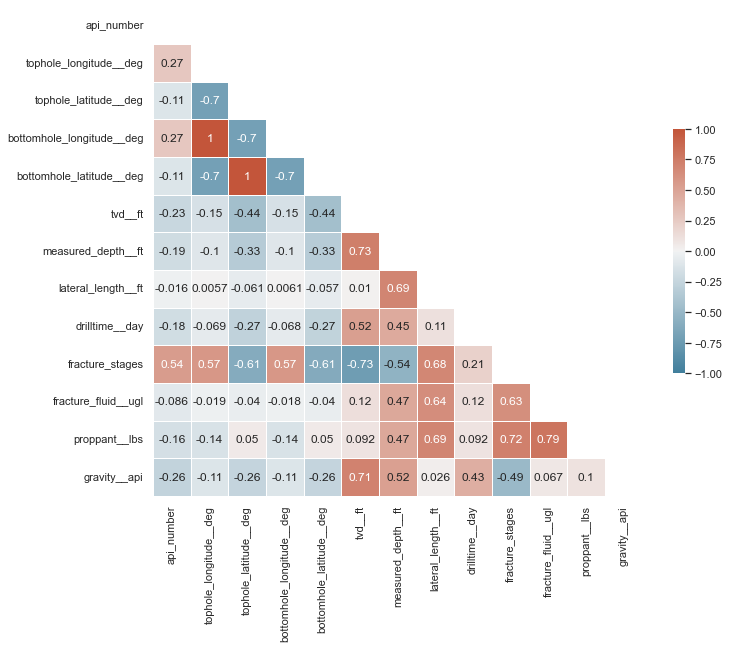

In [ ]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### Understand data distribution and skewness

This will help determine the data distrubtion (eg: normal distribution), and thus might imply using mean, median, mode, max, min, ... in the column

<Figure size 576x360 with 0 Axes>

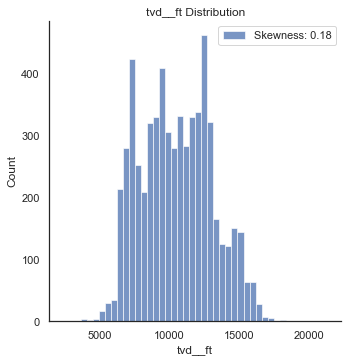

<Figure size 576x360 with 0 Axes>

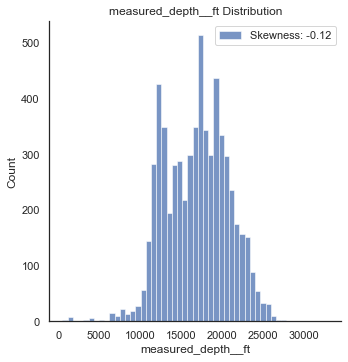

<Figure size 576x360 with 0 Axes>

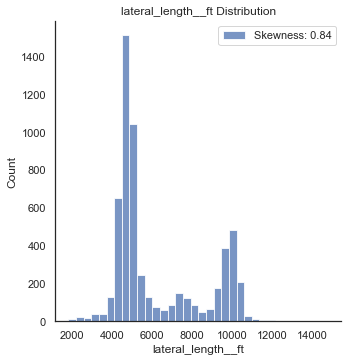

<Figure size 576x360 with 0 Axes>

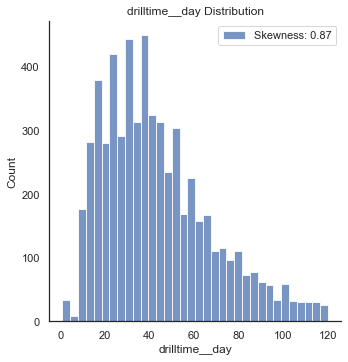

<Figure size 576x360 with 0 Axes>

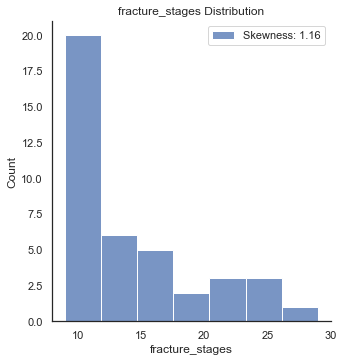

<Figure size 576x360 with 0 Axes>

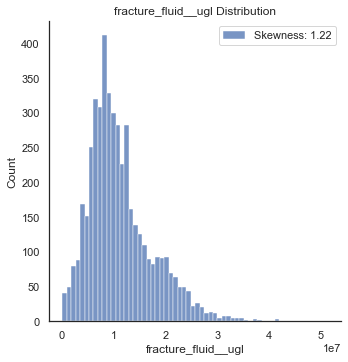

<Figure size 576x360 with 0 Axes>

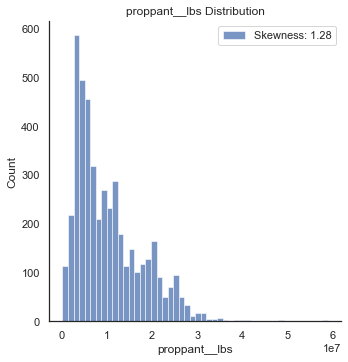

<Figure size 576x360 with 0 Axes>

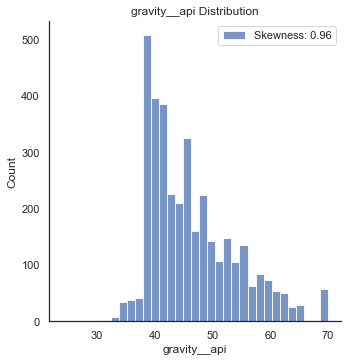

In [ ]:
columns_plot = ["tvd__ft","measured_depth__ft","lateral_length__ft","drilltime__day","fracture_stages","fracture_fluid__ugl","proppant__lbs","gravity__api"]
for col in columns_plot:
    plt.figure(figsize = (8, 5))
    sns.displot(dataset[col], label = 'Skewness: {:.2f}'.format(dataset[col].skew()))
    plt.legend(loc = 'best')
    plt.title(f'{col} Distribution')

## Strategies 



#### Strategy 1:

Drop null values 

In [ ]:
dataset = dataset.dropna(how = 'all') # drop rows that are completely empty 

# how can be any, all
# choose whether to consider doing it on the row or column

Drop column fracture_stages since its 99% null 

In [ ]:
dataset = dataset.drop(['fracture_stages'], axis =1 )

#### Strategy 2:

Fill null values with a fixed value 

In [ ]:
dataset['drilltime__day'] = dataset['drilltime__day'].fillna(0)

Note that fillna is a special case of the replace method which can be used to achieve the same results as fillna

#### Strategy 3:

Fill null values using forward or backward fill 

In [ ]:
dataset['lateral_length__ft'] = dataset['lateral_length__ft'].fillna(method = 'ffill')

In [ ]:
dataset['measured_depth__ft'] = dataset['measured_depth__ft'].fillna(method = 'bfill')

#### Strategy 3:

Fill null values using forward or backward fill 

Note that there could be many options for methods. For simplicity, linear interpolation is chosen, forward interpolation, with no limit on consecutive null values.

From the documentation: 
method : {‘linear’, ‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘barycentric’, ‘krogh’, ‘polynomial’, ‘spline’, ‘piecewise_polynomial’, ‘from_derivatives’, ‘pchip’, ‘akima’}

In [ ]:
dataset.interpolate(method = 'linear', limit_direction = 'forward')

,api_number,tophole_longitude__deg,tophole_latitude__deg,bottomhole_longitude__deg,bottomhole_latitude__deg,well_number,lease_name,permitted_well_type,permit_type,pad,...,drilling_start_date,drilling_end_date,completion_date,tvd__ft,measured_depth__ft,lateral_length__ft,drilltime__day,fracture_fluid__ugl,proppant__lbs,gravity__api
0,35051239740000,-97.989920,34.985080,-98.001965,34.965674,2-24h,Undetermined,Oil & Gas,Horizontal,Yes,...,8/10/2015,9/12/2015,11/17/2015,9548.0,14590.0,4789.90,34.0,NaN,NaN,42.000000
1,35087220320000,-97.669470,35.015940,-97.661975,35.064768,1h-31xr,Harmon,Oil & Gas,Horizontal,Yes,...,7/20/2015,8/22/2015,10/11/2015,10922.0,21388.0,9942.70,34.0,15500000.0,11300000.00,44.900002
2,35017248310000,-98.068107,35.566723,-98.072532,35.586309,11h,Bland 29-13N-8W,Oil & Gas,Horizontal,Yes,...,12/12/2015,12/31/2015,5/3/2017,11413.0,16494.0,4826.95,20.0,12100000.0,12000000.00,45.950001
3,35017248320000,-97.944100,35.608900,-97.948064,35.616585,1-9wh,Siegrist 1307,Oil & Gas,Horizontal,No,...,7/29/2015,8/25/2015,9/19/2015,9563.0,15242.0,5395.05,28.0,14400000.0,12400000.00,47.000000
4,35051239730000,-97.680706,34.709761,-97.675450,34.717717,4-24h,Newy,Oil,Horizontal,Yes,...,8/14/2015,9/22/2015,3/3/2016,14979.0,20365.0,5116.70,40.0,11300000.0,8618998.75,46.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,35073263910000,-98.106175,35.869542,-98.101888,35.898032,1609 5h-1x,Smith Brothers,Oil & Gas,Horizontal,Yes,...,12/20/2018,1/18/2019,5/12/2019,8707.0,19455.0,10210.60,30.0,26100000.0,25900000.00,43.044445
6243,35073263920000,-97.741967,35.971190,-97.741488,35.985682,1-4mh,Kilgore 1705,Oil & Gas,Horizontal,Yes,...,12/31/2018,1/17/2019,8/2/2019,6900.0,12455.0,5277.25,18.0,26050000.0,25800000.00,41.522222
6244,35083244420000,-97.673800,36.028652,-97.674179,36.042679,1mh,Big Zwey 18-04-18,Oil & Gas,Horizontal,Yes,...,1/14/2019,5/4/2019,5/21/2019,6371.0,11505.0,4877.30,111.0,26000000.0,25700000.00,40.000000
6245,35093251870000,-98.869785,36.230148,-98.869785,36.230148,11-1h,Denton,Oil & Gas,Horizontal,Yes,...,6/14/2019,7/11/2019,10/25/2019,9340.0,13964.0,4392.80,28.0,25950000.0,25600000.00,42.400002


#### Strategy 4: 

Use max, min, mean, mode or median 

In [ ]:
dataset['proppant__lbs'] = dataset['proppant__lbs'].fillna(dataset['proppant__lbs'].mean())

In [ ]:
dataset['gravity__api'] = dataset['gravity__api'].fillna(dataset['gravity__api'].median())

In [ ]:
dataset['fracture_fluid__ugl'] = dataset['fracture_fluid__ugl'].fillna(dataset['fracture_fluid__ugl'].mode()[0])

#### Strategy 5: 

Backward or forward fill from other columns. Example code is shown below. Not recommended for this dataset

In [ ]:
# change axis to be 1
# dataset['gravity__api'] = dataset['fracture_fluid__ugl'].fillna(method = 'ffill', axis = 1)

#### Strategy 6: Imputation of missing values

A great statistical approach to infer the missing values. Scikit-learn has a library impute for this purpose. 

Similar to the previous methods, we can use univariate imputation to fill the missing data (SimpleImputer). However, what makes this method powerful is the ability to use a subset or the whole dataset (IterativeImputer)

For rows with multiple features missing, K nearest neighbours algorithm can be implements (KNNImputer)

In [ ]:
from sklearn.impute import SimpleImputer
imputed_dataset =dataset
imp1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp1.fit(dataset[["tvd__ft","measured_depth__ft"]])
SimpleImputer()
imputed_dataset[["tvd__ft","measured_depth__ft"]] =pd.DataFrame(imp1.fit_transform(dataset[["tvd__ft","measured_depth__ft"]]))